# Applied Data Analysis Course Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns= 163
pd.options.display.max_rows=163

In [2]:
# Function to find unique strings in a column
def find_unique_strings(x):
    strings = []
    for entry in x.unique():
        entry.split(',')
        strings.extend(entry.split(','))
    strings = np.array(strings)
    return np.unique(strings)

## C. Text data

You will filter and group your data based on the ingredients_text column. Your goal is to find the five most common ingredients.

In [3]:
df = pd.read_csv('/data/ml_course/02_Data_Analysis/en.openfoodfacts.org.products.csv', index_col=0, parse_dates=[4, 6])
df.head()

,code,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,brands,categories_en,origins,manufacturing_places,labels,emb_codes,first_packaging_code_geo,cities_tags,purchase_places,stores,countries_en,ingredients_text,allergens,allergens_en,traces_en,serving_size,additives_n,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states_en,main_category_en,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-montanic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
2,4559,usda-ndb-import,1489069957,2017-03-09 14:32:37+00:00,1489069957,2017-03-09 14:32:37+00:00,Peanuts,Unknown,Unknown,Unknown,Torn & Glasser,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,United States,"Peanuts, wheat flour, sugar, rice flour, tapio...",Unknown,Unknown,Unknown,28 g (0.25 cup),0.0,Unknown,0.0,Unknown,0.0,Unknown,b,Unknown,Unknown,"To be completed,Nutrition facts completed,Ingr...",Unknown,1941.0,NaN,17.86,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,60.71,17.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.1,17.86,NaN,NaN,NaN,0.63500,0.250,NaN,0.0,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.071,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,16087,usda-ndb-import,1489055731,2017-03-09 10:35:31+00:00,1489055731,2017-03-09 10:35:31+00:00,Organic Salted Nut Mix,Unknown,Unknown,Unknown,Grizzlies,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,United States,"Organic hazelnuts, organic cashews, organic wa...",Unknown,Unknown,Unknown,28 g (0.25 cup),0.0,Unknown,0.0,Unknown,0.0,Unknown,d,Unknown,Unknown,"To be completed,Nutrition facts completed,Ingr...",Unknown,2540.0,NaN,57.14,5.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.86,3.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.1,17.86,NaN,NaN,NaN,1.22428,0.482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.143,NaN,0.00514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0
4,16094,usda-ndb-import,1489055653,2017-03-09 10:34:13+00:00,1489055653,2017-03-09 10:34:13+00:00,Organic Polenta,Unknown,Unknown,Unknown,Bob's Red Mill,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,United States,Organic polenta,Unknown,Unknown,Unknown,35 g (0.25 cup),0.0,Unknown,0.0,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,"To be completed,Nutritio

In [4]:
ingredients = df.ingredients_text
ingredients.unique()

array(['Peanuts, wheat flour, sugar, rice flour, tapioca starch, salt, leavening (ammonium bicarbonate, baking soda), soy sauce (water, soybeans, wheat, salt), potato starch.',
       'Organic hazelnuts, organic cashews, organic walnuts almonds, organic sunflower oil, sea salt.',
       'Organic polenta', ..., 'Eau, malt, sucre, houblon',
       "thé vert, arôme naturel bergamote avec autres arômes naturels, écorces d'orange douce 3%",
       'Citric acid, maltodextrin, instant tea, aspartame**, caramel color, natural and artificial flavors, contains less than 2% of: magnesium oxide acesulfame potassium, calcium silicate, yellow 5, red 40.'],
      dtype=object)

In [5]:
def  transform(s):    
    s=s.str.lower()
    
    # unify separator
    s = s.str.replace(' *[\•+;+,+\(+\)+\[+\]+\:+] *', ',')
    s = s.str.replace(' +\- +', ',')
    s = s.str.replace(',+', ',')
    
    # Remove special characters
    s = s.str.replace('[\.\*]+', '')
    s = s.str.replace('\_', ' ')
    
    return s

In [6]:
ingredients = transform(ingredients)
ingredients.unique()

array(['peanuts,wheat flour,sugar,rice flour,tapioca starch,salt,leavening,ammonium bicarbonate,baking soda,soy sauce,water,soybeans,wheat,salt,potato starch',
       'organic hazelnuts,organic cashews,organic walnuts almonds,organic sunflower oil,sea salt',
       'organic polenta', ...,
       "céréales 49%,farine de blé,flocons b d'avoine,farine de seigle,farine d'orge,sucre,pépites de chocolat 11,5%,pâte de cacao,sucre,beurre,lécithines de tournesol,extrait de vanille,de cacao,émulsifiant beurre 10%,noisettes 5%,huile de colza,cacao maigre en poudre,arôme naturel de cacao,sel marin,arôme naturel de vanille,poudre à lever,carbonates d'ammonium,oeufs en poudre,poudre de lait écrémé traces éventuelles d'autres fruits à coque,de soja,de graines de sésame et d'arachide",
       "thé vert,arôme naturel bergamote avec autres arômes naturels,écorces d'orange douce 3%",
       'citric acid,maltodextrin,instant tea,aspartame,caramel color,natural and artificial flavors,contains less than 2% 

In [7]:
ingredients2 = ingredients.str.split(',', expand=True).stack().to_frame(name='ingredients')
ingredients2['number'] = 1
ingredients2 = ingredients2.groupby('ingredients').count()
ingredients2.sort_values(by='number', ascending=False, inplace=True)
ingredients2.reset_index(inplace=True)

In [8]:
ingredients2.iloc[:120, :]

,ingredients,number
0,salt,102777
1,sugar,78326
2,water,72206
3,sel,47246
4,,42259
5,sucre,36906
6,eau,36223
7,citric acid,32741
8,riboflavin,21623
9,niacin,21287


In [9]:
# Transform states data
def  translate(s):
    s=s.str.strip()
    
    # Translate the first 100 most common entries
    s=s.str.replace(r'\bsel\b', 'salt')
    s=s.str.replace(r'\bsucre\b', 'sugar')
    s=s.str.replace(r'\beau\b', 'water')
    s=s.str.replace(r'\bémulsifiant\b', 'emulsifier')
    s=s.str.replace(r'\bacide citrique\b', 'citric acid')
    s=s.str.replace(r'\bacidifiant\b', 'acidifier')
    s=s.str.replace(r'\bconservateur\b', 'preservative')
    s=s.str.replace(r'\bhuile de tournesol\b', 'sunflower oil')
    s=s.str.replace(r'\barôme naturel\b', 'natural flavor')
    s=s.str.replace(r'\barômes naturels\b', 'natural flavors')
    s=s.str.replace(r'\barômes\b', 'flavors')
    s=s.str.replace(r'\barôme\b', 'flavor')
    s=s.str.replace(r'\bhuile de colza\b', 'colza oil')
    s=s.str.replace(r'\bfarine de blé\b', 'wheat flour')
    s=s.str.replace(r'\bsirop de glucose\b', 'glucose syrup')
    s=s.str.replace(r'\bcolorant\b', 'color')
    s=s.str.replace(r'\bbeurre de cacao\b', 'cocoa butter')
    s=s.str.replace(r'\bpâte de cacao\b', 'cocoa paste')
    s=s.str.replace(r'\bail\b', 'garlic')
    s=s.str.replace(r'\blait\b', 'milk')
    s=s.str.replace(r'\b[ée]pices\b', 'spices')
    s=s.str.replace(r'\blevure\b', 'yeast')
    s=s.str.replace(r'\boignons\b', 'onions')
    
    return(s)

In [10]:
ingredients2.ingredients = translate(ingredients2.ingredients)

In [11]:
ingredients2.iloc[:120, :]

,ingredients,number
0,salt,102777
1,sugar,78326
2,water,72206
3,salt,47246
4,,42259
5,sugar,36906
6,water,36223
7,citric acid,32741
8,riboflavin,21623
9,niacin,21287


In [12]:
ingredients2 = ingredients2.groupby('ingredients').sum()
ingredients2.sort_values(by='number', ascending=False, inplace=True)

In [13]:
ingredients2.drop(index='', inplace=True)

In [14]:
ingredients2.iloc[:120, :]

,number
ingredients,
salt,150404
sugar,115371
water,108567
citric acid,42645
wheat flour,24783
natural flavor,22074
riboflavin,21634
niacin,21292
spices,21037


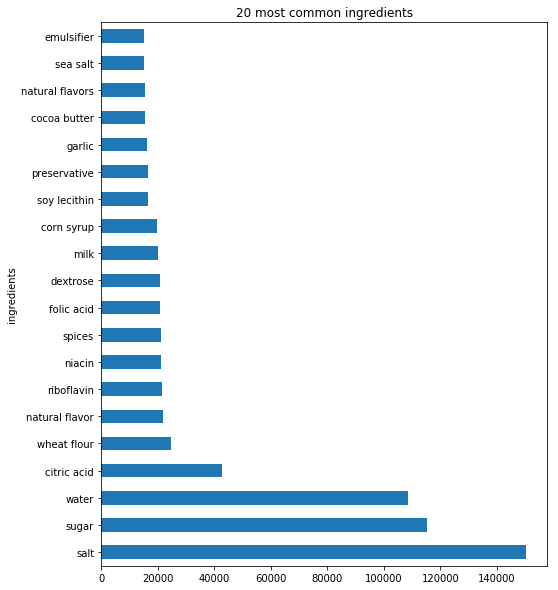

In [15]:
ingredients2.iloc[0:20].plot.barh(figsize=(8, 10), title='20 most common ingredients', legend=None)
plt.show()

Note: There are many, many words in French. Moreover there are ingredients with defining adjectives (e.g. sea salt, organic ...). Also, there are ingredients with complex composition. I opted to translate only the most common entries in French and to keep the adjectives. The results would be different with a different approach